In [2]:
import math
import numpy as np
from pyscf import gto, scf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
LiH = gto.M(atom='H 0 0 0; Li 0 0 1.4', basis='sto-3g',unit='au',charge=0)
rhf = scf.RHF(LiH)
#print(LiH.nao)
e_rhf_sto3g = rhf.kernel()

LiH = gto.M(atom='H 0 0 0; Li 0 0 1.4', basis='ccpvdz',unit='au',charge=0)
rhf = scf.RHF(LiH)
#print(LiH.nao)
e_rhf_ccpvdz = rhf.kernel()

LiH = gto.M(atom='H 0 0 0; Li 0 0 1.4', basis='ccpvtz',unit='au',charge=0)
rhf = scf.RHF(LiH)
#print(LiH.nao)
e_rhf_ccpvtz = rhf.kernel()

LiH = gto.M(atom='H 0 0 0; Li 0 0 1.4', basis='ccpvqz',unit='au',charge=0)
rhf = scf.RHF(LiH)
#print(LiH.nao)
e_rhf_ccpvqz = rhf.kernel()

converged SCF energy = -7.54470387022927
converged SCF energy = -7.6654526946354
converged SCF energy = -7.67810974407451
converged SCF energy = -7.67961681750832


In [3]:
ofile = open("pec.dat","w")
ofile.write("#r[au] Energy[a.u]\n")
for i in range(1,30):
    z = 0.4+0.2*i
    print(f"#Distance between LiH:{z:.3f}")
    
    LiH = gto.M(atom='H 0 0 0; Li 0 0 '+str(z), basis='sto-3g', unit='au',charge=0)
    rhf = scf.RHF(LiH)
    e_rhf_sto3g = rhf.kernel()
    
    LiH = gto.M(atom='H 0 0 0; Li 0 0 '+str(z), basis='ccpvdz', unit='au',charge=0)
    rhf = scf.RHF(LiH)
    e_rhf_ccpvdz = rhf.kernel()
    
    LiH = gto.M(atom='H 0 0 0; Li 0 0 '+str(z), basis='ccpvtz', unit='au',charge=0)
    rhf = scf.RHF(LiH)
    e_rhf_ccpvtz = rhf.kernel()
    
    LiH = gto.M(atom='H 0 0 0; Li 0 0 '+str(z), basis='ccpvqz', unit='au',charge=0)
    rhf = scf.RHF(LiH)
    e_rhf_ccpvqz = rhf.kernel()
    
    ofile.write("{0:.10f}\t{1:15.10f}{2:15.10f}{3:15.10f}{4:15.10f}\n"
                .format(z,e_rhf_sto3g,e_rhf_ccpvdz,e_rhf_ccpvtz,e_rhf_ccpvqz))
ofile.close()

#Distance between LiH:0.600
converged SCF energy = -6.02157244857365
converged SCF energy = -6.17661928274375
converged SCF energy = -6.27720299215806
converged SCF energy = -6.28896601245148
#Distance between LiH:0.800
converged SCF energy = -6.72747356247358
converged SCF energy = -6.86317245379543
converged SCF energy = -6.91517854045719
converged SCF energy = -6.92267906618611
#Distance between LiH:1.000
converged SCF energy = -7.1188014236676
converged SCF energy = -7.24864679535656
converged SCF energy = -7.27990049136953
converged SCF energy = -7.28388647209382
#Distance between LiH:1.200
converged SCF energy = -7.37263783011162
converged SCF energy = -7.49786235307209
converged SCF energy = -7.51743409542527
converged SCF energy = -7.51960685319008
#Distance between LiH:1.400
converged SCF energy = -7.54470387022927
converged SCF energy = -7.6654526946354
converged SCF energy = -7.67810974407451
converged SCF energy = -7.67961681750832
#Distance between LiH:1.600
converged SCF 

(-8.0, -7.95)

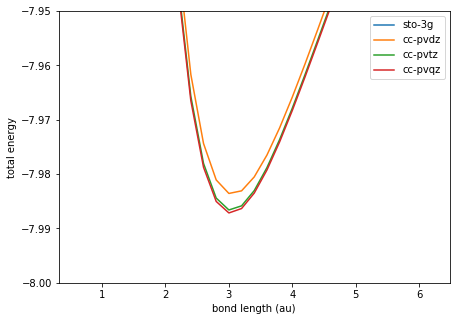

In [3]:
R,es,ed,et,eq = np.loadtxt("./pec.dat",unpack=True)
plt.figure(figsize=(7, 5))
plt.plot(R,es,label='sto-3g')
plt.plot(R,ed,label='cc-pvdz')
plt.plot(R,et,label='cc-pvtz')
plt.plot(R,eq,label='cc-pvqz')
plt.legend(loc='best')
plt.xlabel('bond length (au)')
plt.ylabel('total energy')
plt.ylim(-8.0, -7.95)